# Imports

In [1]:
#manipulação de dados
import pandas  as pd
import numpy   as np
import inflection
import regex   as re

#visualização
import seaborn as sns
from matplotlib           import pyplot  as plt
from plotly               import express as px
from IPython.core.display import HTML

#métricas
from yellowbrick.cluster  import KElbowVisualizer, SilhouetteVisualizer
from sklearn              import metrics as m

#modelos
from sklearn              import cluster as c

## Helper funtions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# load data

In [3]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv',encoding= 'unicode_escape')

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
df1 = df_raw.copy()

**data dimensions**

In [6]:
df1.shape

(541909, 9)

**Rename columns**

In [7]:
old_cols = df1.columns
snakecase = lambda x: inflection.underscore(x)
new_cols = list(map(snakecase,old_cols))
df1.columns = new_cols

In [8]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country', 'unnamed: 8'],
      dtype='object')

**delete column**

In [9]:
df1.drop(columns='unnamed: 8',inplace=True)

In [10]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Data types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## Checking NA

In [12]:
df1.isnull().sum()/len(df_raw)*100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

### replace NA

In [13]:
df1 = df1.dropna(subset=['description','customer_id'])

In [14]:
1- df1.shape[0]/df_raw.shape[0]

0.24926694334288602

In [15]:
df1.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Chaging types

In [16]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

In [17]:
df1['invoice_date']

0        2016-11-29
1        2016-11-29
2        2016-11-29
3        2016-11-29
4        2016-11-29
            ...    
541904   2017-12-07
541905   2017-12-07
541906   2017-12-07
541907   2017-12-07
541908   2017-12-07
Name: invoice_date, Length: 406829, dtype: datetime64[ns]

In [18]:
#df1['invoice_no'].astype(int)

'Invoice_no' possui letras em algumas linhas, necessita de limpeza mais detalhada

# Data description

In [19]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


'invoice_no', : categorical atributtes

'stock_code': categorical atributtes

'description': categorical atributtes

'quantity': numerical atributtes

'invoice_date': numerical atributtes

'unit_price': numerical atributtes

'customer_id': categorical atributtes

'country': categorical atributtes

In [20]:
num_atributtes = df1[['quantity','unit_price','invoice_date']]
cat_atributtes = df1[['customer_id','description','country','invoice_no','stock_code']]

## numerical statistcs

In [21]:
num_statistcs = num_atributtes.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistcs['range'] = num_statistcs['max'] - num_statistcs['min']
num_statistcs= num_statistcs[['min','max','range','mean','median','std','skew','kurtosis']]
num_statistcs

,min,max,range,mean,median,std,skew,kurtosis
quantity,-80995.0,80995.0,161990.0,12.061303,5.0,248.69337,0.182663,94317.563673
unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315162,452.219019,246924.542988
invoice_date,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,2017-07-08 03:16:19.124890624,2017-07-29 00:00:00,112 days 20:24:50.915259100,NaN,NaN


1. - Quantity negativa (pode ser devolução)
2. - Preço unitário igual a zero (promoção?)

## Categorical statistcs

In [22]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

customer_id     4372
description     3896
country           37
invoice_no     22190
stock_code      3684
dtype: int64

In [23]:
# Invoice no
#cat_atributtes.loc[cat_atributtes['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))),:].drop_duplicates()
df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))),:]

df_letter_invoice

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom


In [24]:
len(df_letter_invoice)

8905

Todas os pedidos que possuem letra no 'invoice_no', também possuem valores positivos de quantidade

In [25]:
len(df1[df1['quantity']<0])

8905

A quantidade de pedidos que tem 'quantity' menor ou igual a zero é igual a quantidade de pedidos que possuem letra no código 'invoice_no' 

Logo se supõem que pedidos com letras no 'inovice_no' são devoluções

In [26]:
# stock code
cat_atributtes.loc[cat_atributtes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$',x))),'stock_code'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [27]:
# description
 # remoção da descrição

In [28]:
cat_atributtes['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [29]:
cat_atributtes['country'].value_counts(normalize=True)

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

Remover 'European Community' e 'Unspecified'

# Filter

In [30]:
df2 = df1.copy()

In [31]:
# unit price > 0.0
df2 = df2.loc[df2['unit_price'] > 0.010,:]

#stock code != ['POST','D','M','DOT','CRUK','C2']
df2 = df2[~df2['stock_code'].isin(['POST','D','M','DOT','CRUK','C2'])]

# description
df2.drop(columns='description',inplace=True)

# country
df2 = df2[~df2['country'].isin(['European Community','Unspecified'])]

# description
## quantity - Negative numbers means product returns
df_returns = df2.loc[df2['quantity']<0,:]
df_purchase = df2.loc[df2['quantity']>0,:]

# Features enginering

In [32]:
df3 = df2.copy()

In [33]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom


## Feature creation

In [34]:
df_ref = pd.DataFrame(df3['customer_id'])

In [35]:
df_ref =  df_ref.drop_duplicates(ignore_index=True)

In [36]:
# gross revenue (faturamento) quantity * price
df_purchase.loc[:,'gross_revenue'] = df_purchase.loc[:,'quantity'] * df_purchase.loc[:,'unit_price']
df_monetary = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary,on='customer_id',how='left')

df_recency = df_purchase[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()- df_recency['invoice_date']).dt.days
df_recency = df_recency.drop(columns = 'invoice_date')
df_ref = pd.merge(df_ref,df_recency,on='customer_id',how='left')


#frequency

df_freq = df_purchase[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref,df_freq,on='customer_id',how='left')


# avf ticket
df_avg_ticket = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref,df_avg_ticket,on='customer_id',how='left')

df_avg_returns = df_returns[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'return'})
df_ref = pd.merge(df_ref,df_avg_returns,on='customer_id',how='left')
df_ref.loc[df_ref['return'].isna(),'return'] = 0

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [37]:
df_ref.isnull().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
return            0
dtype: int64

In [38]:
df_ref = df_ref.dropna()

In [39]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,return
0,17850.0,5391.21,372.0,34.0,18.152222,1.0
1,13047.0,3232.59,56.0,9.0,18.904035,7.0
2,12583.0,6705.38,2.0,15.0,28.902500,2.0
3,13748.0,948.25,95.0,5.0,33.866071,0.0
4,15100.0,876.00,333.0,3.0,292.000000,3.0


In [40]:
df4 = df_ref.copy()

# EDA

In [41]:
df5 = df4.copy()

# Data preparation

In [42]:
df6 = df5.copy()

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss = StandardScaler()

df6['gross_revenue'] = ss.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = ss.fit_transform(df6[['recency_days']])
df6['invoice_no'] = ss.fit_transform(df6[['invoice_no']])
df6['avg_ticket'] = ss.fit_transform(df6[['avg_ticket']])
df6['return'] = ss.fit_transform(df6[['return']])

In [45]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,return
0,17850.0,0.378060,2.791504,3.893137,-0.033930,0.114575
1,13047.0,0.135805,-0.360996,0.621606,-0.033418,3.158196
2,12583.0,0.525545,-0.899714,1.406774,-0.026613,0.621845
3,13748.0,-0.120559,0.028079,0.098161,-0.023235,-0.392695
4,15100.0,-0.128667,2.402430,-0.163561,0.152452,1.129115


# Feature selection

In [46]:
df7 = df6.copy()

# Fine tuning

In [47]:
X = df7.drop(columns='customer_id')

In [48]:
clusters = [2,3,4,5,6,7]

## Within-Cluster Sum of Square (WSS)

In [49]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10,max_iter=300,random_state=42)
    #model training
    kmeans.fit(X)
    
    wss.append(kmeans.inertia_)

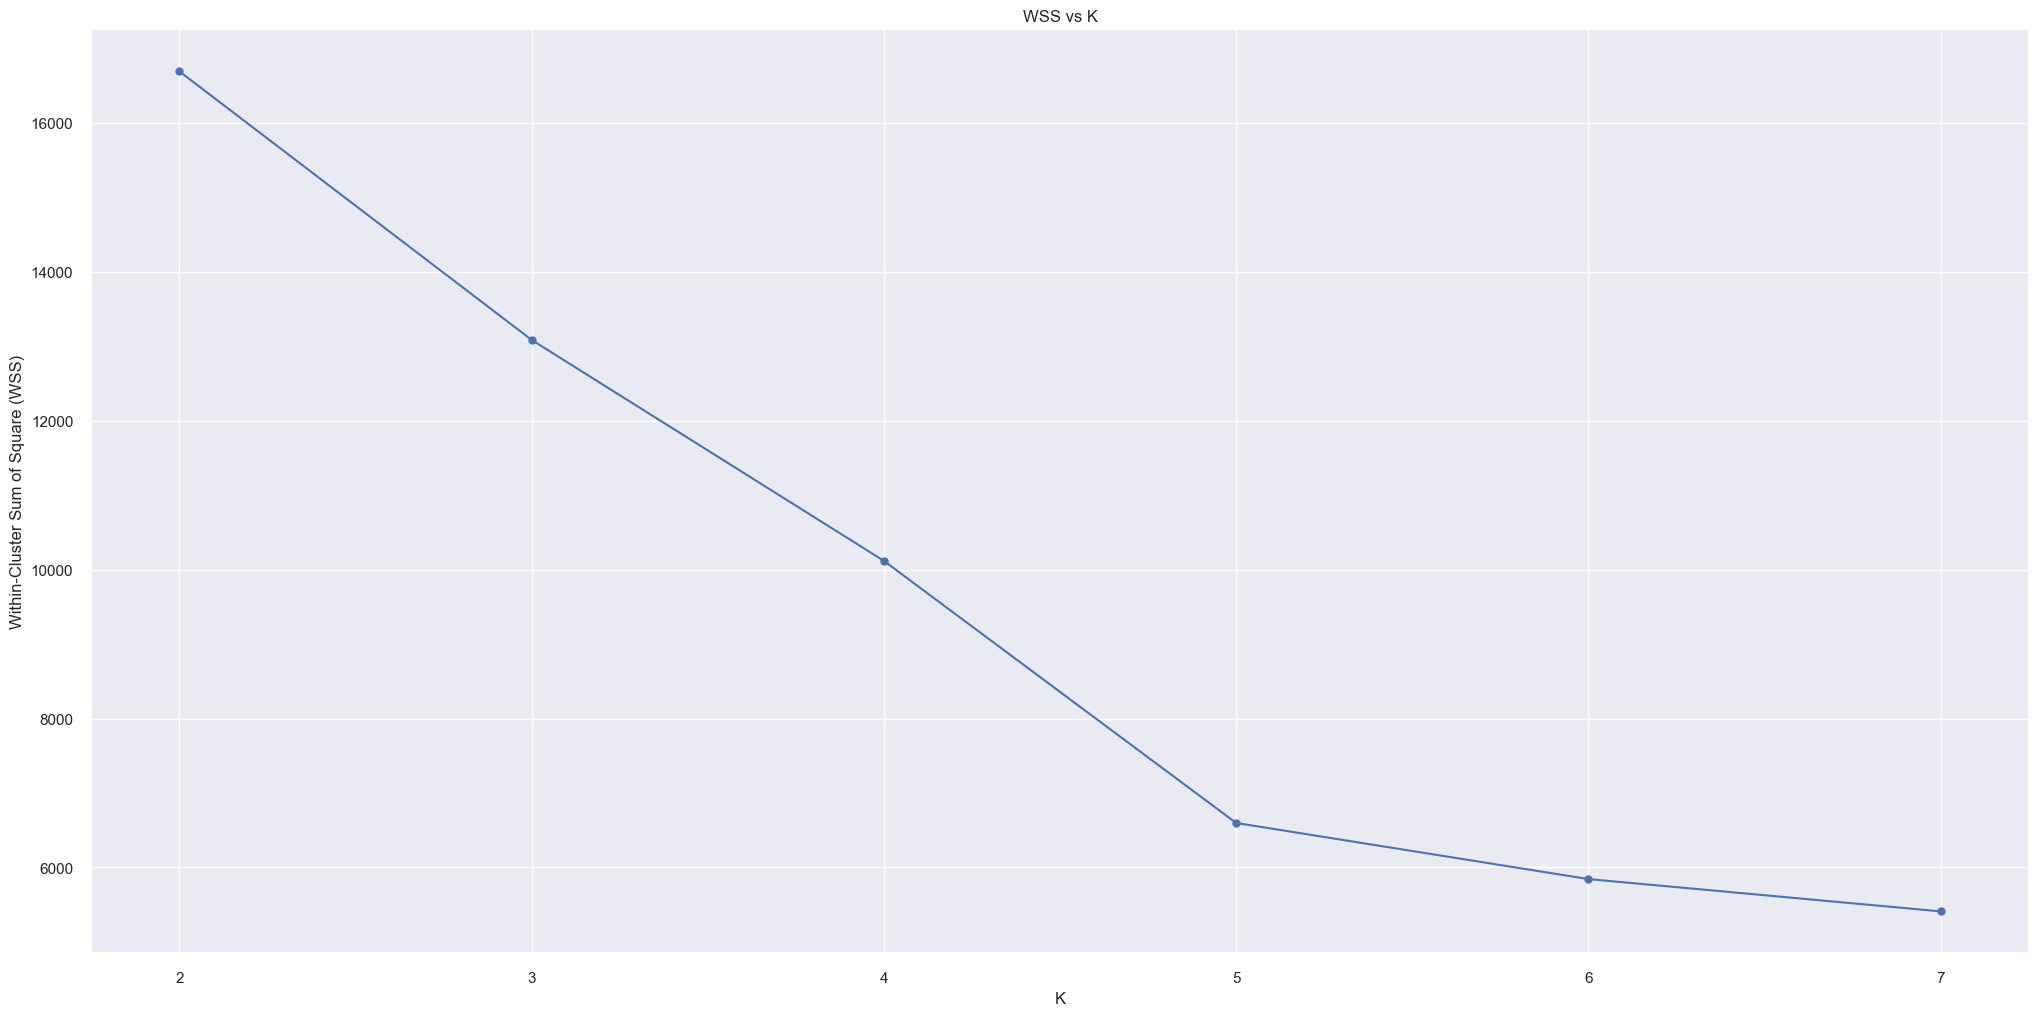

In [50]:
plt.plot(clusters,wss, marker = 'o');
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square (WSS)');
plt.title('WSS vs K');

Escolher os pontos com maior variação

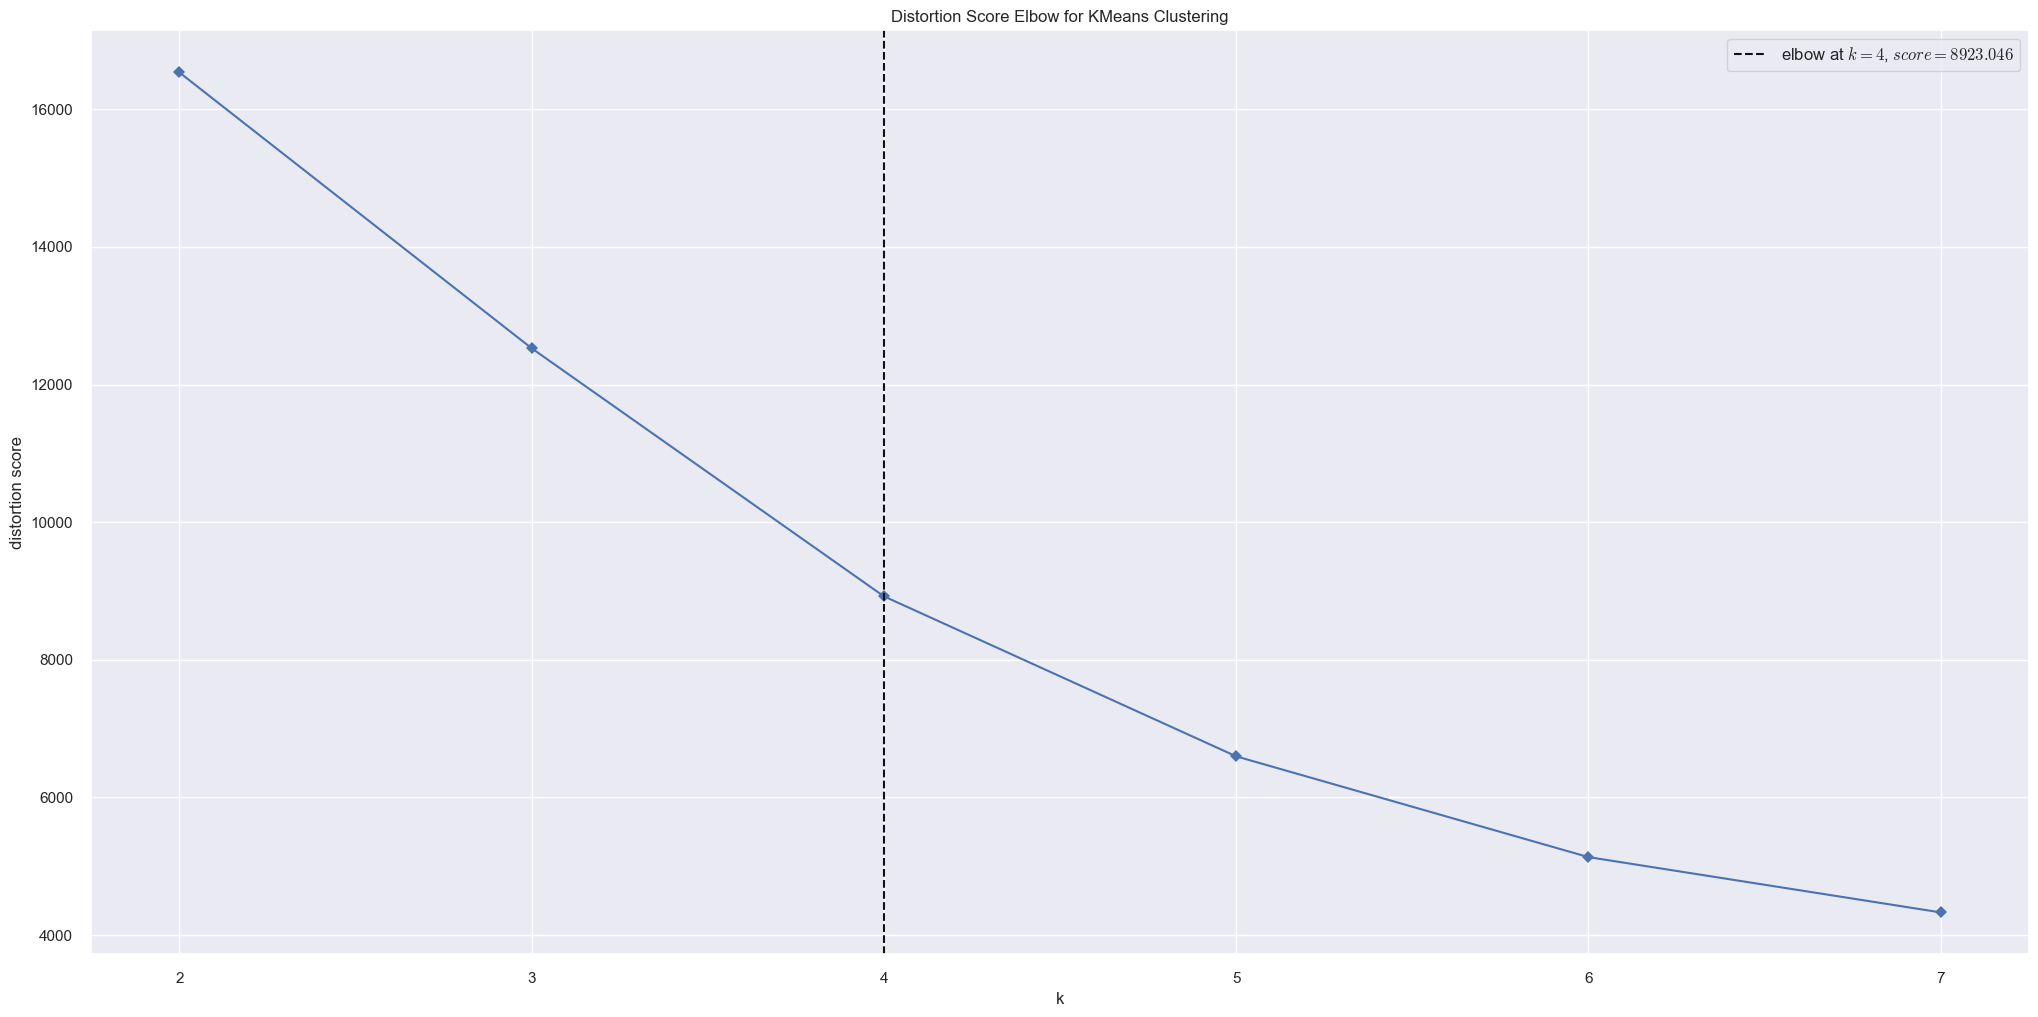

In [51]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(X)
kmeans.show();

## Sillhouete Score

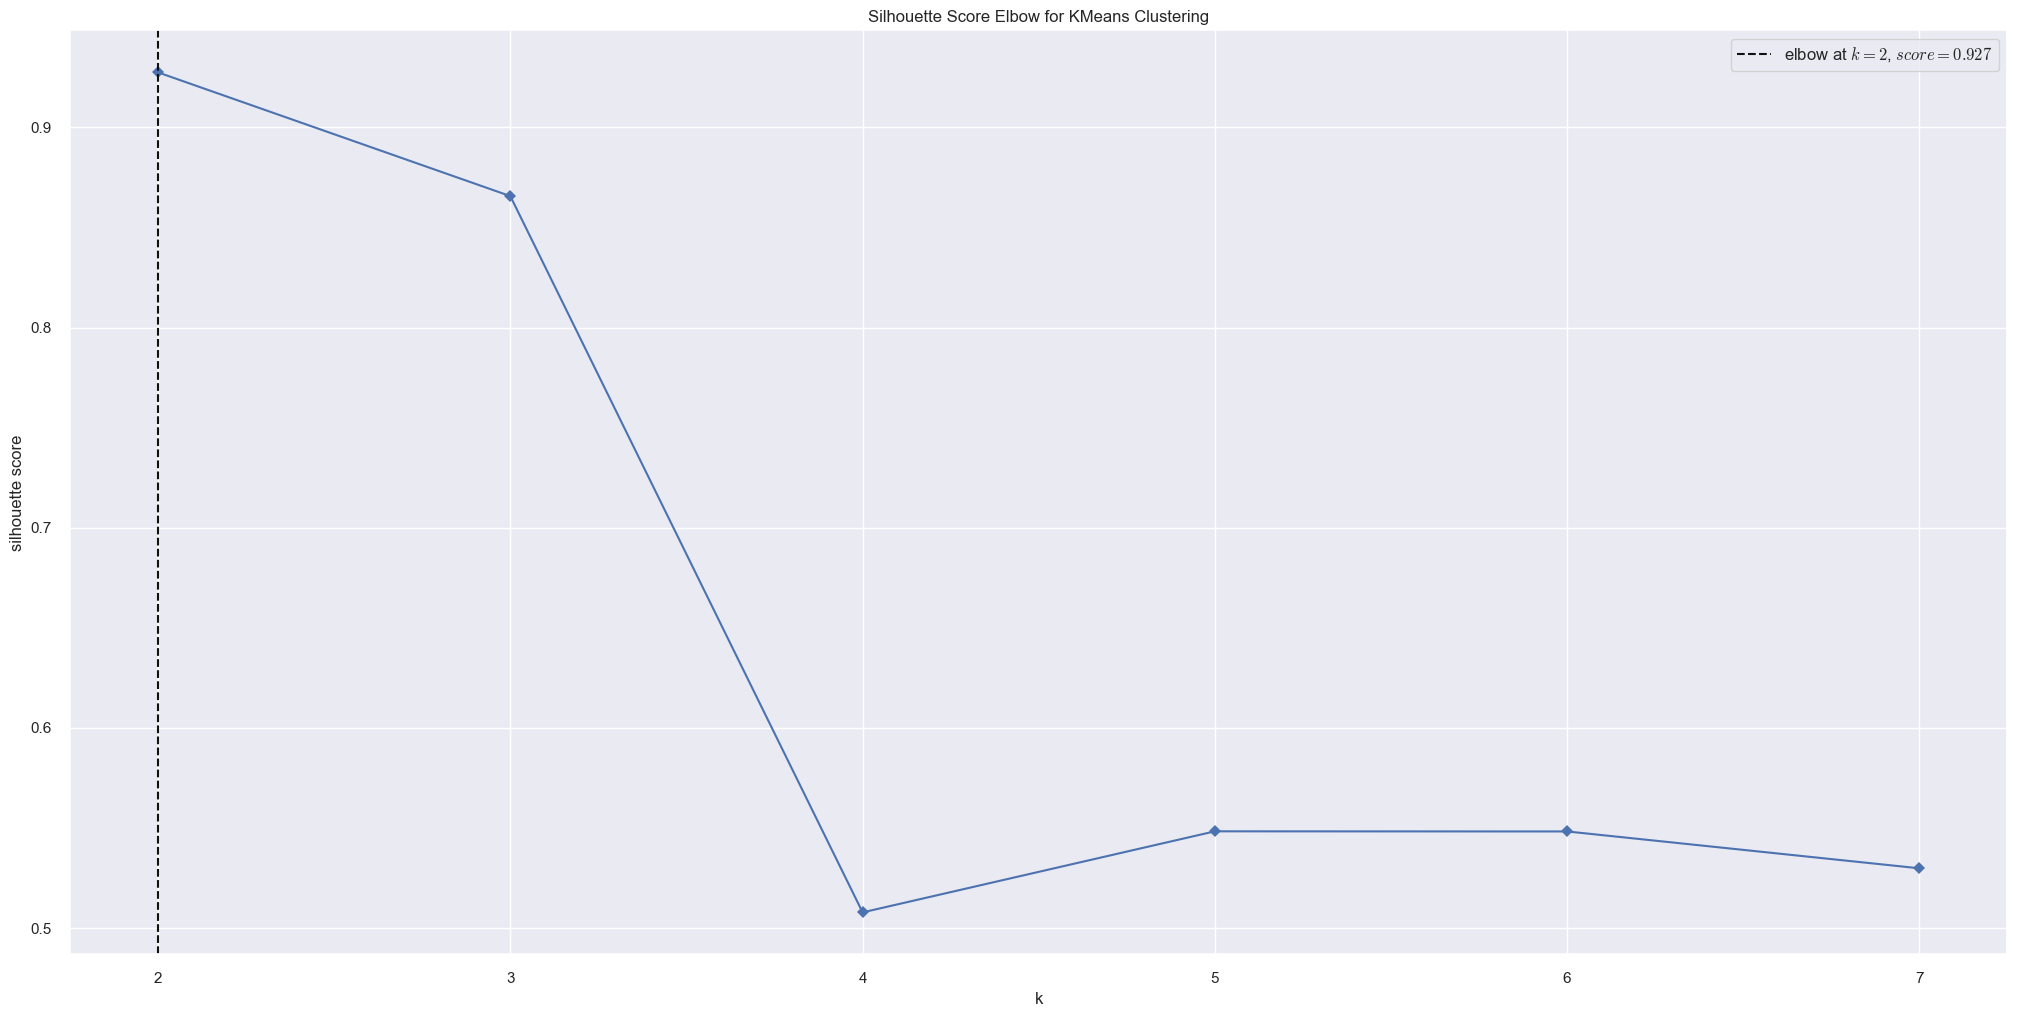

In [52]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,metric='silhouette',timings=False)
kmeans.fit(X)
kmeans.show();

## Silhouete analisys

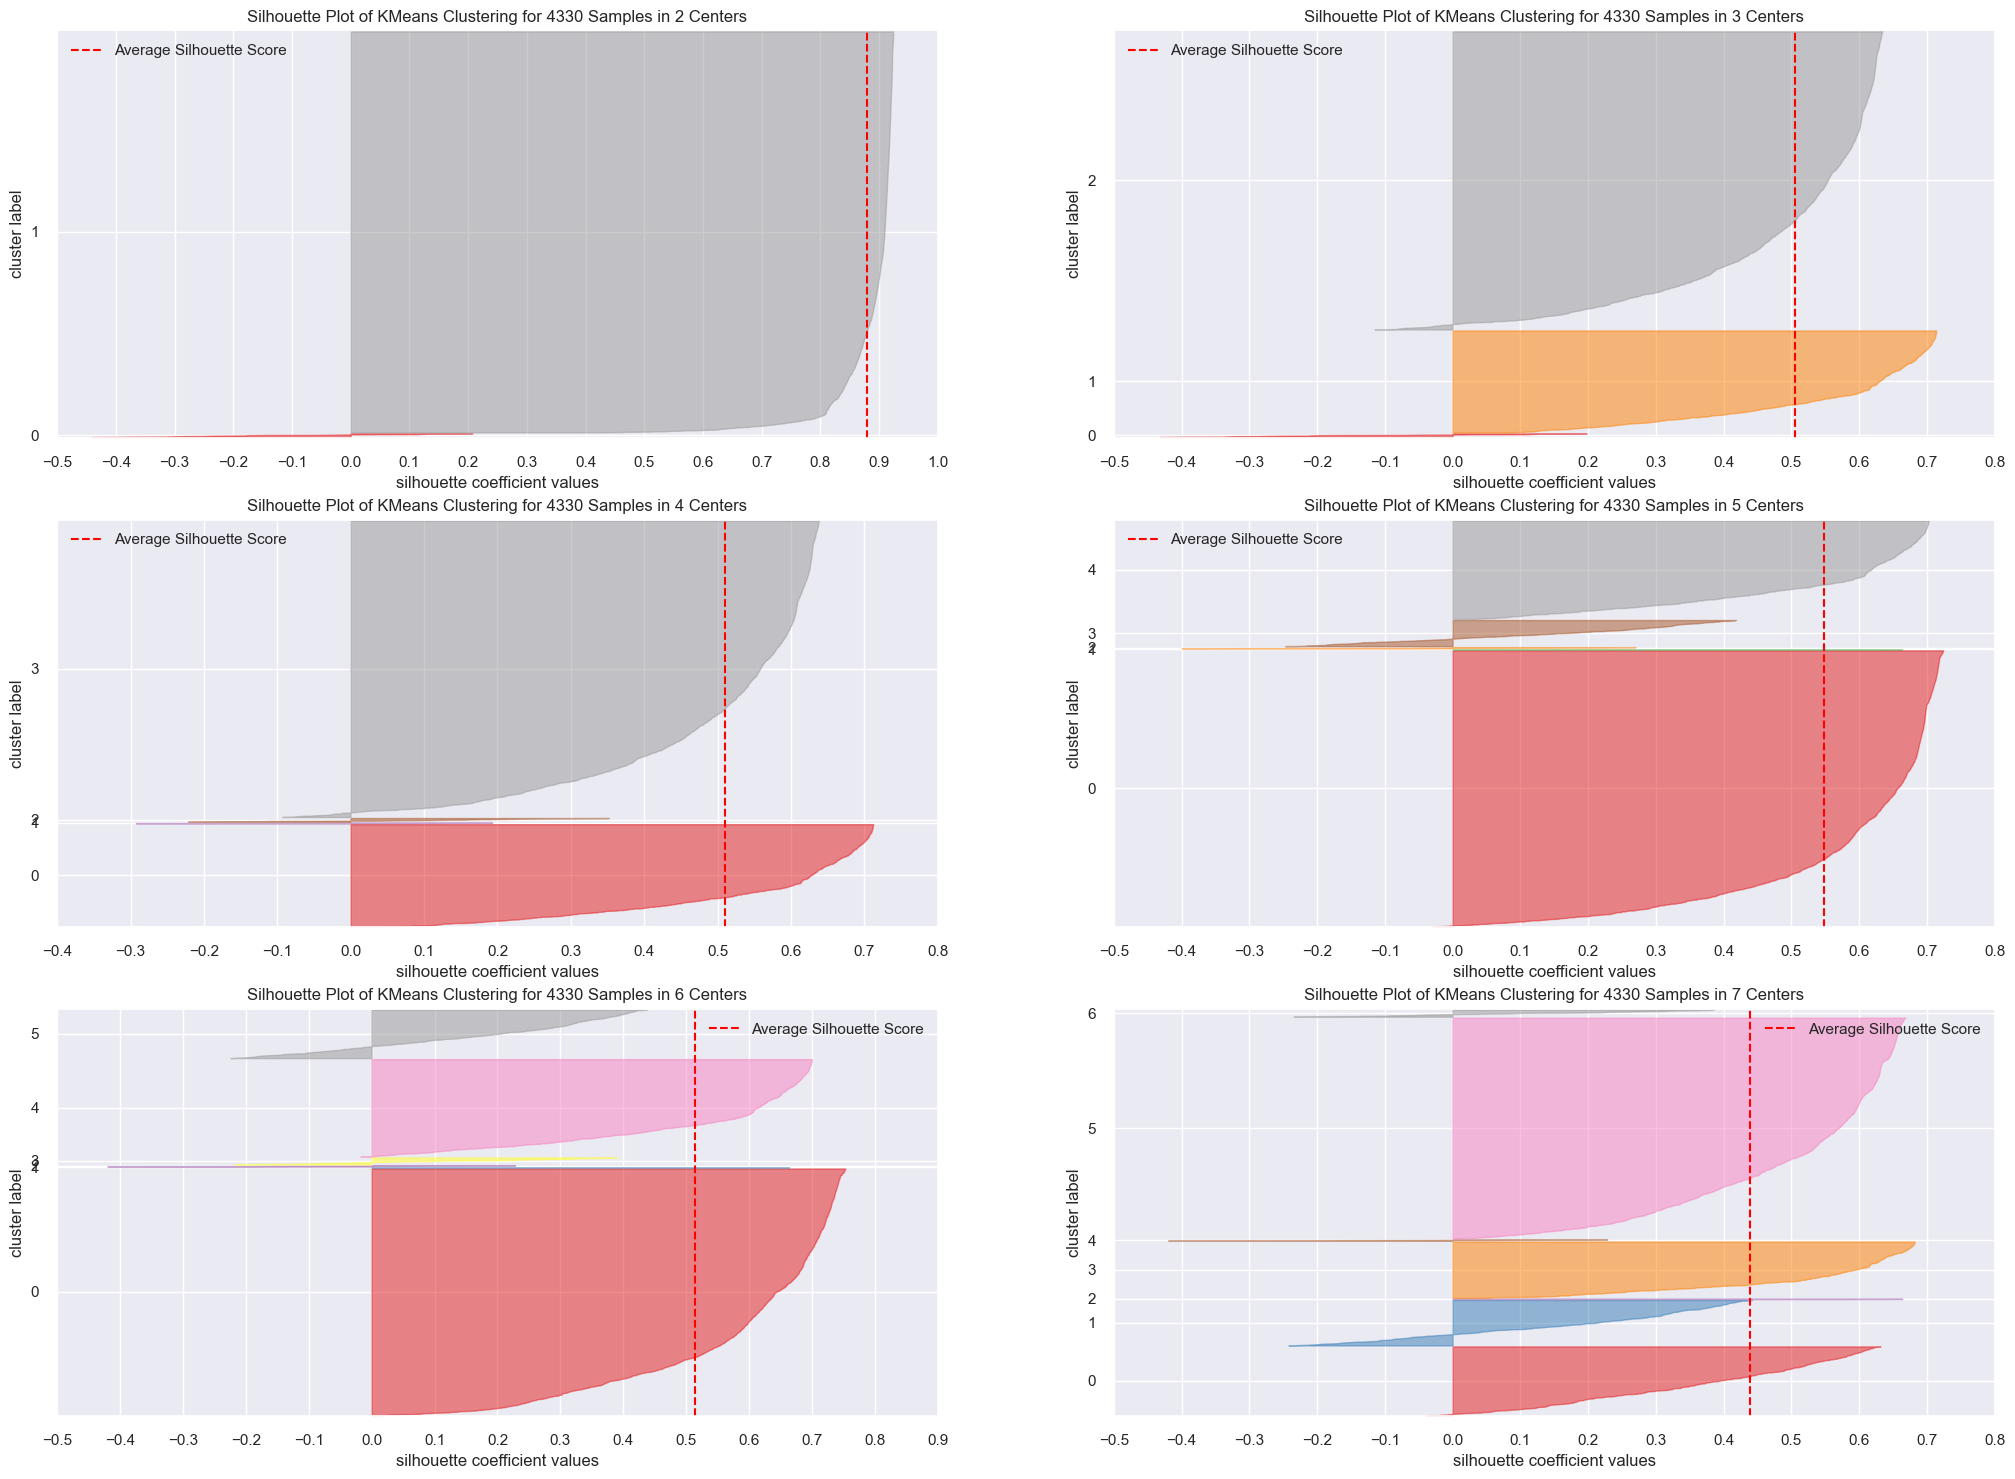

In [53]:
fig, ax = plt.subplots(3,2,figsize=(25,18))
#k=2
for k in clusters:
    km = c.KMeans(n_clusters=k,init='random',n_init=10, max_iter=100,random_state=42)
    l,i = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick',ax=ax[l-1][i])
    visualizer.fit(X)
    visualizer.finalize()

# Model training

## K-means

In [54]:
#model training
k = 3
kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
#model training
kmeans.fit(X)
#clustering
labels = kmeans.labels_

### Cluster validation

In [55]:
# WSS
print('WSS value',kmeans.inertia_)

## SS (Silhouette Score)
print('SS value',m.silhouette_score(X,labels,metric='euclidean'))

WSS value 13085.489895080249
SS value 0.5059639914865645


### Cluster analysis

In [56]:
df9 = df7.copy()
df9['clusters'] = labels

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


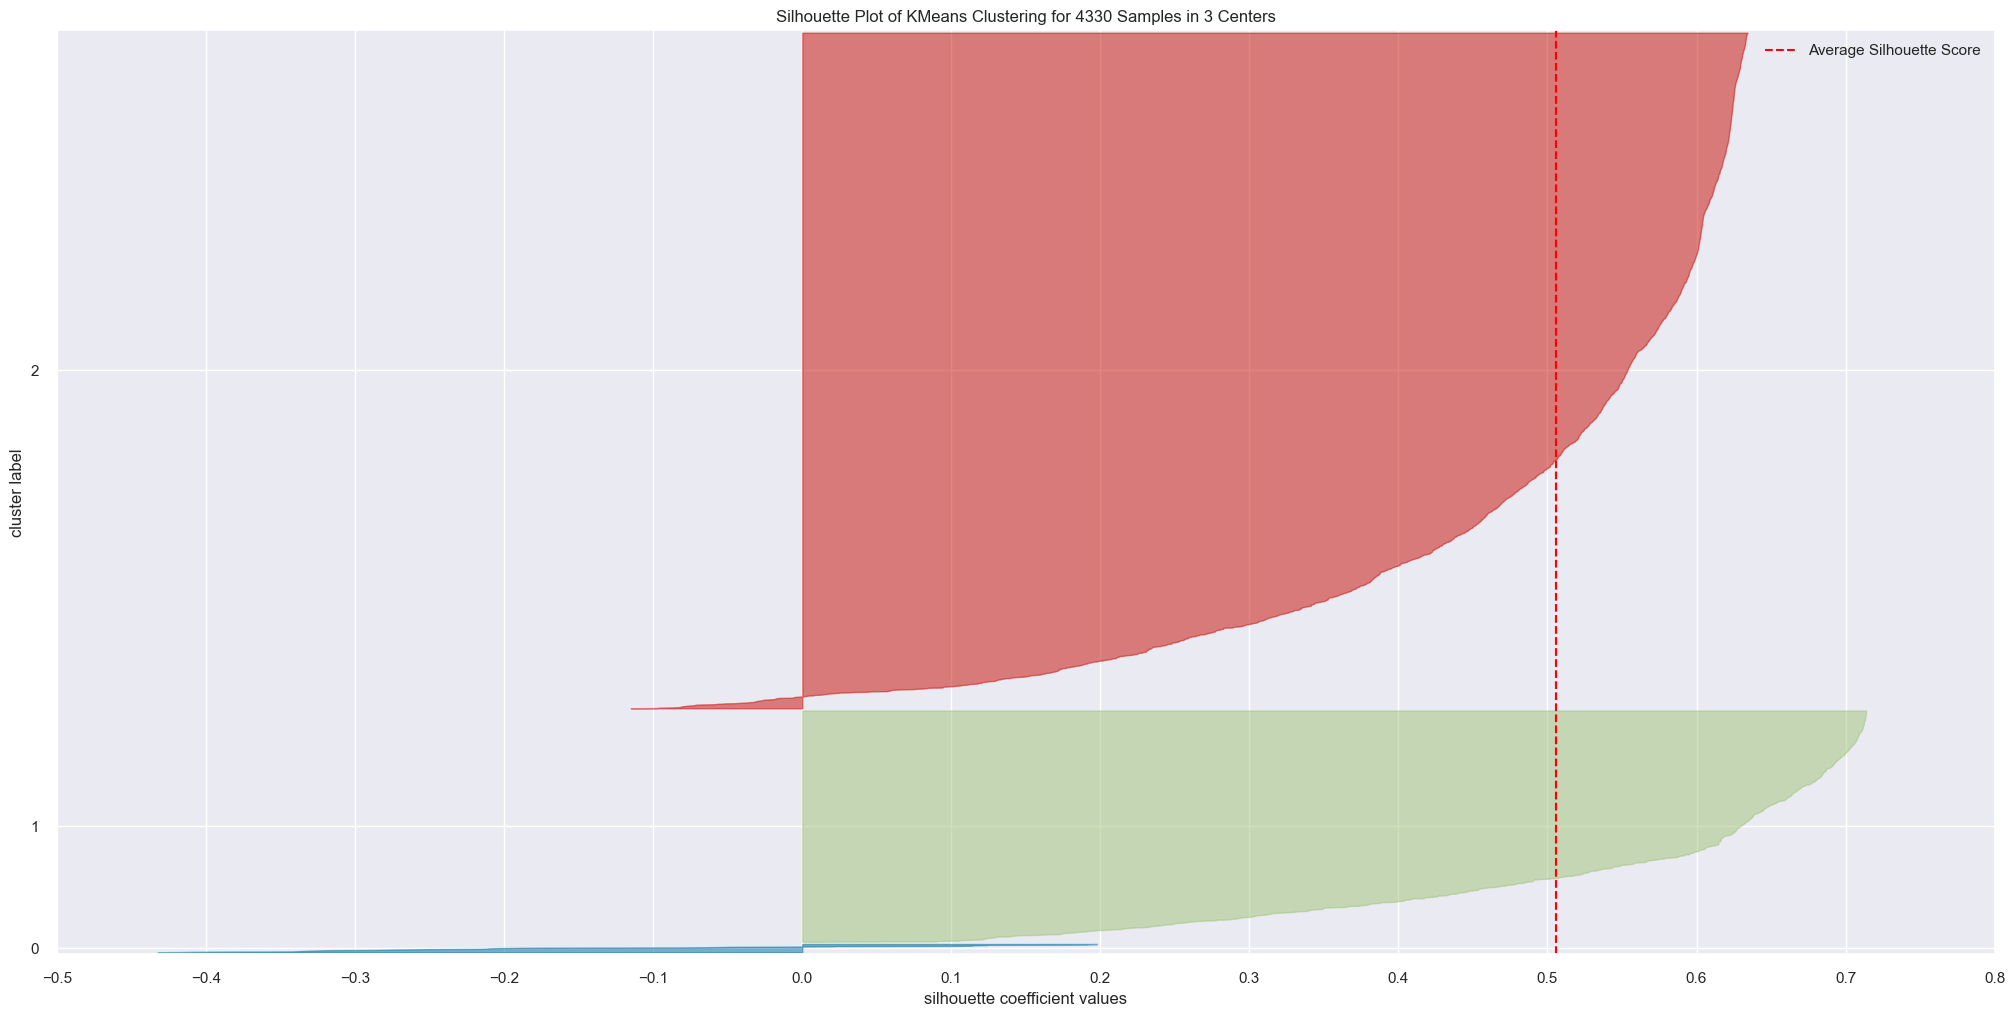

In [57]:
visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

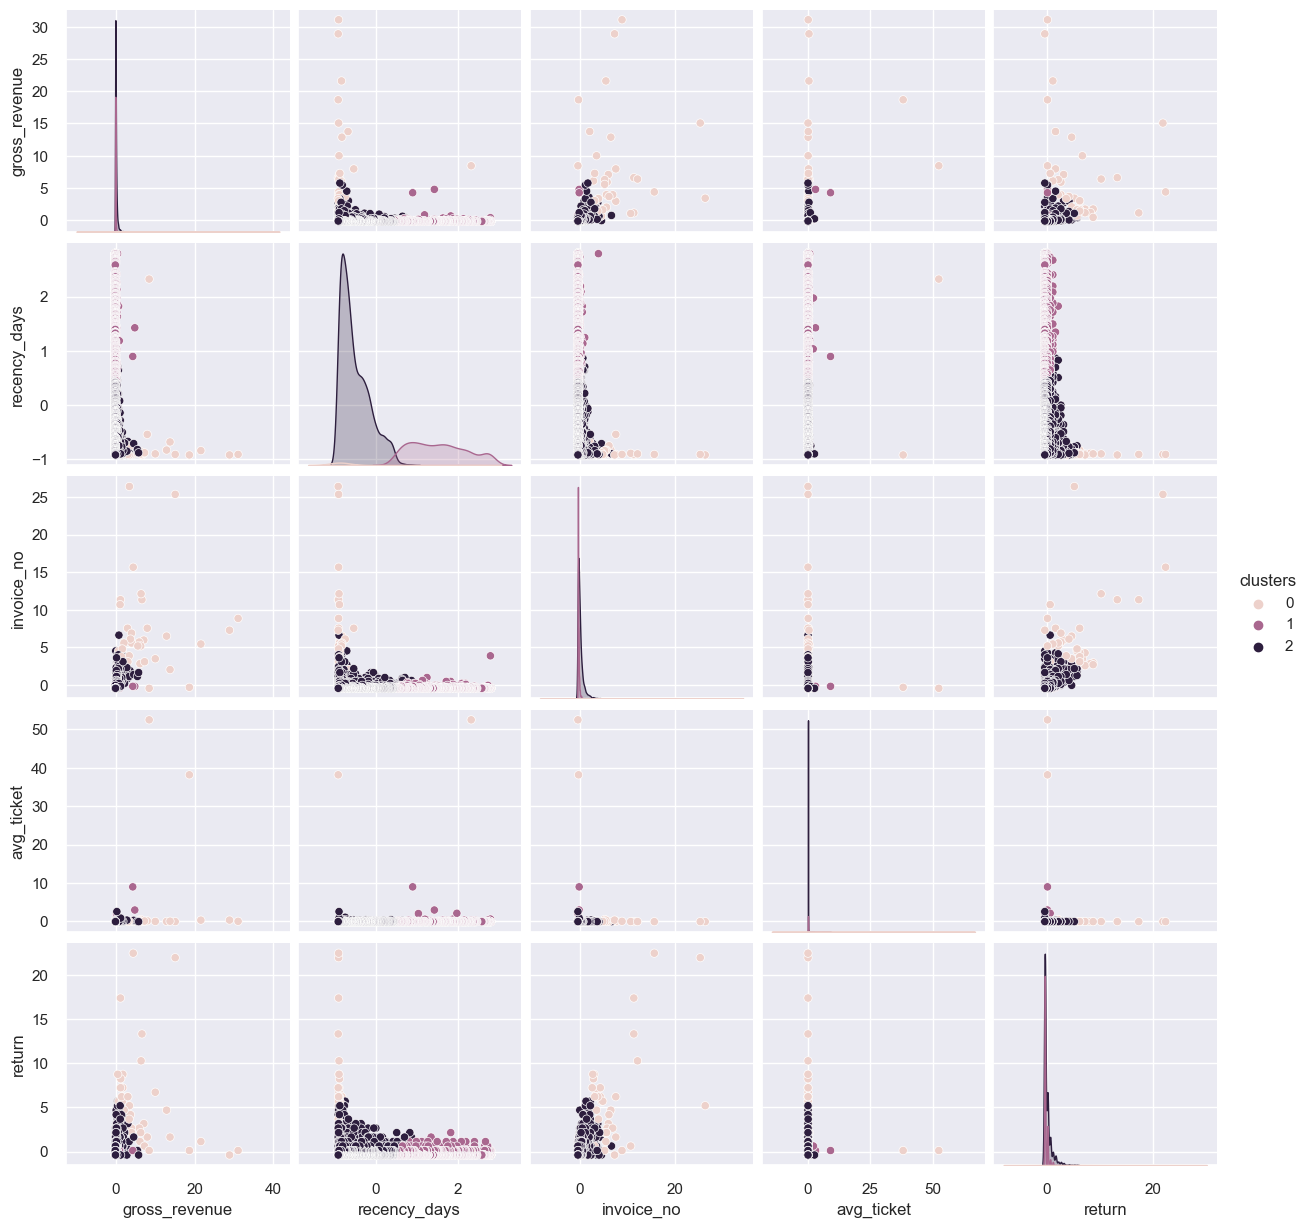

In [58]:
df_viz = df9.drop(columns='customer_id',axis=1)
sns.pairplot(df_viz,hue='clusters')

### UMAP - t-SNE
### Machine leraning - Manifold
PCA - Matrix, Espaço de distâncias - 9 condições - Colorários
UMAP, T-SNE (2009) - Manifold - Topologia

**UMAP**

In [59]:
import umap.umap_ as umap

In [60]:
reducer = umap.UMAP(n_neighbors=100,random_state=42)
embedding = reducer.fit_transform(X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

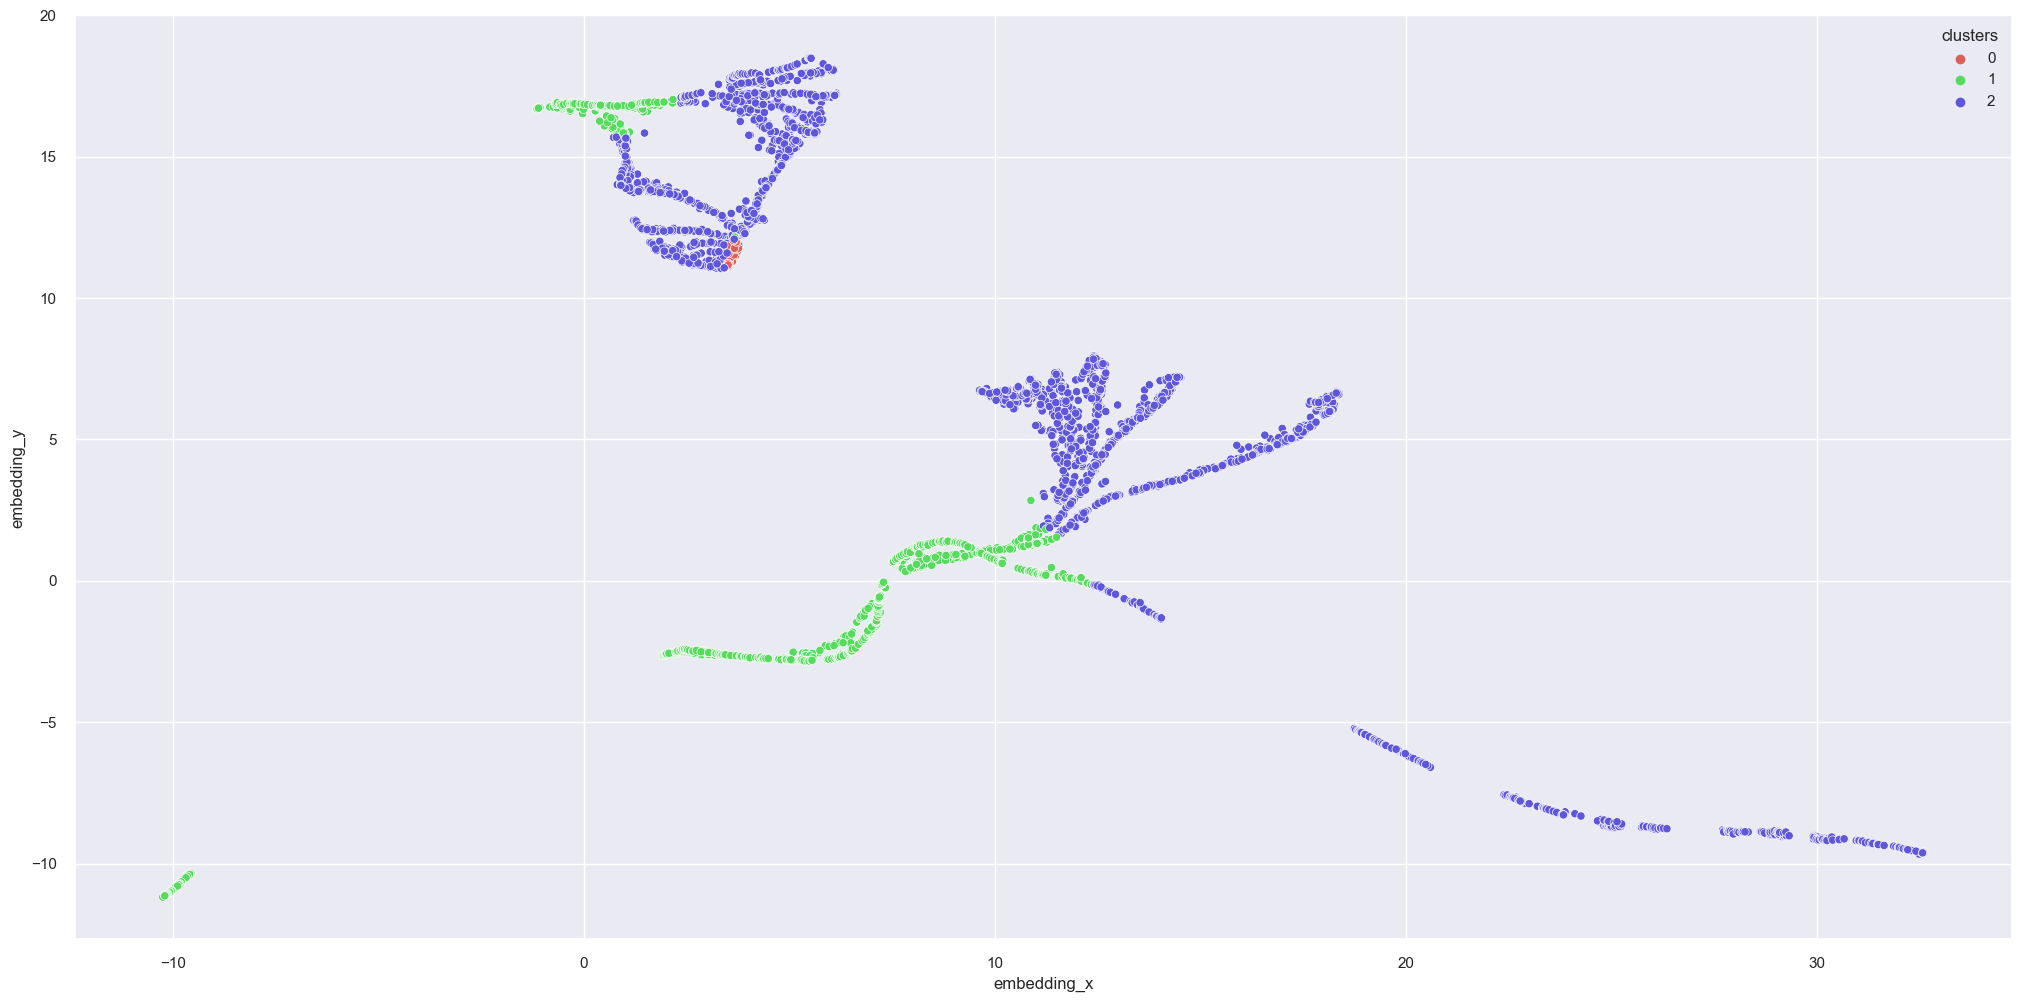

In [61]:
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

sns.scatterplot(x='embedding_x',y='embedding_y',hue='clusters', palette=sns.color_palette('hls',n_colors=len(df_viz['clusters'].unique())),data = df_viz)

### Cluster profile

In [62]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,return,clusters
0,17850.0,0.378060,2.791504,3.893137,-0.033930,0.114575,1
1,13047.0,0.135805,-0.360996,0.621606,-0.033418,3.158196,2
2,12583.0,0.525545,-0.899714,1.406774,-0.026613,0.621845,2
3,13748.0,-0.120559,0.028079,0.098161,-0.023235,-0.392695,2
4,15100.0,-0.128667,2.402430,-0.163561,0.152452,1.129115,1


In [63]:
# number of customers
df_cluster = df9[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100
# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='inner',on='clusters')

# avg recency days
df_avg_recency_days =  df9[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='inner',on='clusters')

# avg invoice no
df_avg_invoice_no =  df9[['invoice_no','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_invoice_no,how='inner',on='clusters')

df_ticket =  df9[['avg_ticket','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_ticket,how='inner',on='clusters')

In [64]:
df_cluster

,clusters,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,40,0.923788,6.685399,-0.794714,6.500548,2.308958
1,1,1094,25.265589,-0.165249,1.529662,-0.351959,-0.008701
2,2,3196,73.810624,-0.027107,-0.513661,0.039118,-0.025920
